In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import xgboost as xg
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import barplot
%matplotlib inline

In [1]:
classification = make_classification(n_samples = 1000, n_features = 10, class_sep = 0.3, n_redundant = 2, n_clusters_per_class= 2, n_informative = 2)
X = classification[0]
y = classification[1]

NameError: name 'make_classification' is not defined

In [94]:
print X.shape, y.shape, set(y)

(1000, 10) (1000,) set([0, 1])


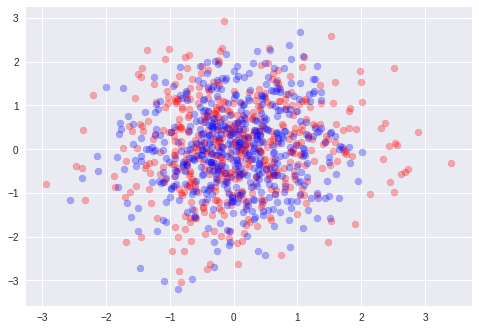

In [95]:
plt.scatter(X[y==1][:,0], X[y==1][:,1], color = 'r', alpha = 0.3)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color = 'b', alpha = 0.3)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [97]:
def get_score(model, X_train, X_test, y_train, y_test):
    clf = model()
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [98]:
scores = []
lst = [SVC, xg.XGBClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, LogisticRegression, LinearRegression]
names = []

for i in lst:
    scores.append(get_score(i, X_train, X_test, y_train, y_test))

names = []
for models in lst:
    names.append(models().__class__.__name__)

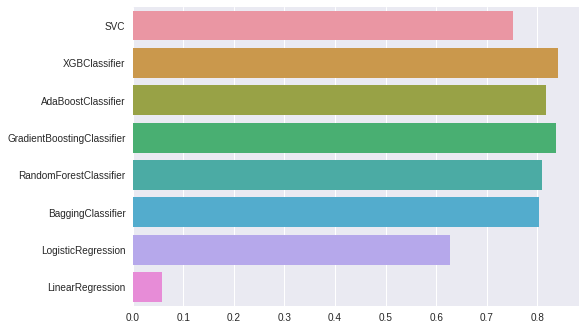

In [99]:
barplot(x = scores, y = names)